# **A Case Study on Relationship between Dengue fever and Landuse** 
Dengue is a viral infection transmitted to humans through the bite of infected mosquitoes. The primary vectors that transmit the disease are Aedes aegypti mosquitoes and, to a lesser extent, Ae. albopictus.

Severe dengue is a leading cause of serious illness and death in some Asian and Latin American countries. It requires management by medical professionals.

The global incidence of dengue has grown dramatically with about half of the world's population now at risk. Although an estimated 100-400 million infections occur each year, over 80% are generally mild and asymptomatic.

## Table of Contents
1. <a href='#introduction'>Introduction</a>
2. <a href='#data_sources'>Data Sources</a>
3. <a href='#data_cleansing'>Data Inspection and Cleansing</a>
4. <a href='#data_analysis'>Data Analysis</a>
5. <a href='#conclusions'>Conclusions and Future Research</a>
6. <a href='#references'>References</a>



<a id='introduction'></a>
# **1.Introduction**

This case study was carried out by Center for Dengue Research of  University of Sri Jayawardenapura ,Sri Lanka.Data was collected in 2012 throughout the year in Colombo Municipal Council area. Main purpose of the case study was to understand the relationship between Landuse ,patient locations and breeding locations

**Demographics of Colombo Municipal Council**

* largest Local Authority in Sri Lanka and one of the oldest in South Asia
* resident population of 647,100 (2001 census) and a floating population of nearly 500,000 (estimated).So largest population in a local Council area in Sri Lanka



<a id='data_sources'></a>
# **2.Data Sources**


* Data sources contains Landuse polygon shapefile , Patient locations and Breeding locations shapefile which are point shapes




* Landuse polygon data source was obtained from [Survey Department of Sri Lanka](https://www.survey.gov.lk/sdweb/pages_more_feature.php?id=2e191ea21bfa87b884fb7848da909f1ff0b200bc&l=sd) in 2012 during the study.This covers Colombo municipal council area

* Patient location and Breeding locations were collected with the help of Public health officers of the municipality in 2012 dengue outbreak with the guidance of [Center of Dengue Research](https://www.sjp.ac.lk/research/centers/centre-for-dengue-research/) and [Master of Science in GIS and Remote Sensing](http://fhss.sjp.ac.lk/geog/m-sc-programme-in-gis-remote-sensing/) Students from 2012 batch of University of Sri Jayawardenapura.

In [3]:
import geopandas as gp
import folium 
from folium.plugins import MarkerCluster
import geoplot
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


/usr/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
/usr/lib/gdalplu

<a id='data_cleansing'></a>
# **3.Data Inspection and Cleansing**



In [4]:
landuse_gdf=gp.read_file("landuse.shp")
patient_gdf=gp.read_file("Patients_locations.shp")
breeding_gdf=gp.read_file("Breeding.shp")

## 3.1 Landuse Data Set

In [5]:
landuse_gdf.head()


,ID,WARD_NO,BLOCK_NO,EXTENT,LU_CODE,DESCRIPTON,AREA,PERIMETER,ACRES,HECTARES,geometry
0,1,37,26,0.138,5,Banking and Allied,1382.030,170.073,0.342,0.138,"POLYGON ((8888924.434 770872.408, 8888928.735 ..."
1,2,37,26,0.083,4,Wholesale and Retail,831.688,116.101,0.206,0.083,"POLYGON ((8888885.366 770887.989, 8888885.728 ..."
2,3,37,26,0.097,36,Stores and Warehouses,974.121,141.458,0.241,0.097,"POLYGON ((8888760.435 770851.904, 8888784.336 ..."
3,4,37,26,0.447,11,Residential,4467.501,317.296,1.104,0.447,"POLYGON ((8888784.336 770858.808, 8888800.567 ..."
4,5,37,26,0.118,4,Wholesale and Retail,1182.453,147.380,0.292,0.118,"POLYGON ((8888937.356 770832.489, 8888938.837 ..."


In [6]:
len(landuse_gdf.index)

11049

Landuse dataset contains 11049 polygon features with following columns
								
* ID
* WARD_NO
* BLOCK_NO
* EXTENT
* LU_CODE
* DESCRIPTON
* PERIMETER
* ACRES
* HECTARES
* geometry





## 3.2 Patient locations Data Set

In [7]:
patient_gdf.head()

,Id,Y,X,X_WGS,Y_WGS,geometry
0,1,191350.176120,98154.5,79.852109,6.921703,POINT (8889096.097 772401.528)
1,2,191267.315886,98078.6,79.851424,6.920953,POINT (8889019.809 772317.364)
2,3,191205.170710,97995.7,79.850675,6.920389,POINT (8888936.431 772254.190)
3,4,192883.090462,98824.3,79.858143,6.935576,POINT (8889767.782 773957.151)
4,5,192917.615559,98720.7,79.857205,6.935886,POINT (8889663.367 773991.956)


In [8]:
len(patient_gdf.index)

100

Patient location dataset contains 100 point features with following columns
								
* Id
* Y
* X
* X_WGS
* Y_WGS
* geometry


## 3.3 Breeding locations Data Set

In [9]:
breeding_gdf.head()

,IDNO,X_WGS,Y_WGS,geometry
0,1,79.864849,6.923861,POINT (8890514.366 772643.515)
1,2,79.862705,6.921391,POINT (8890275.657 772366.480)
2,3,79.861415,6.925688,POINT (8890132.000 772848.328)
3,4,79.863590,6.928262,POINT (8890374.198 773137.067)
4,5,79.853228,6.932785,POINT (8889220.663 773644.187)


In [10]:
len(breeding_gdf.index)

320

Breeding location dataset contains 320 point features with following columns
								
* IDNO
* X_WGS
* Y_WGS
* geometry

## 3.4 Preprocessing data sets

As projections of the datasets were not set properly but collected using [EPSG:5234 ](https://epsg.io/5234)Kandawala / Sri Lanka Grid for plotting and for use in web maps datasets were reprojected  [EPSG:3857](https://epsg.io/3857) - WGS 84 / Pseudo-Mercator -- Spherical Mercator, Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI using [ArcGIS reproject fucntion](https://pro.arcgis.com/en/pro-app/latest/help/analysis/raster-functions/reproject-function.htm) in ArcGIS 10.7

In [11]:
landuse_gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
patient_gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
breeding_gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<a id='data_analysis'></a>
# **4.Data Analysis**


Case study questions

1. Relationship between the Landuse and patient locations
2. Relationship between Landuse and Breeding Locations 
3. Relationship between patient locations and Breeding locations


Landuse layer was plotted on top of Openstreet map to understand the study area visually

In [14]:
map = folium.Map([6.867,79.98],zoom_start=12)


tooltip_b="Breeding Locations"
for each in breeding_gdf.iterrows():
    
    popup = "Breeding Location"
    
    folium.Marker(list((each[1]['X_WGS'],each[1]['Y_WGS'])), popup=popup,tooltip=tooltip_b,icon=folium.Icon(color="green")).add_to(map)
tooltip_d="Dengue Patients"
for each in patient_gdf.iterrows():
    
    popup = "Dengue Patient"
    
    folium.Marker(list((each[1]['X_WGS'],each[1]['Y_WGS'])), popup=popup,tooltip=tooltip_d,icon=folium.Icon(color="red", icon="info-sign")).add_to(map)
folium.Choropleth(
    geo_data=landuse_gdf["geometry"],
    name="choropleth",
    data=landuse_gdf,
    columns=['ID','DESCRIPTON'],
    fill_color="YlGn",
    fill_opacity=0.2,
    line_opacity=0.2,
).add_to(map)
map

In [15]:
breeding_gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

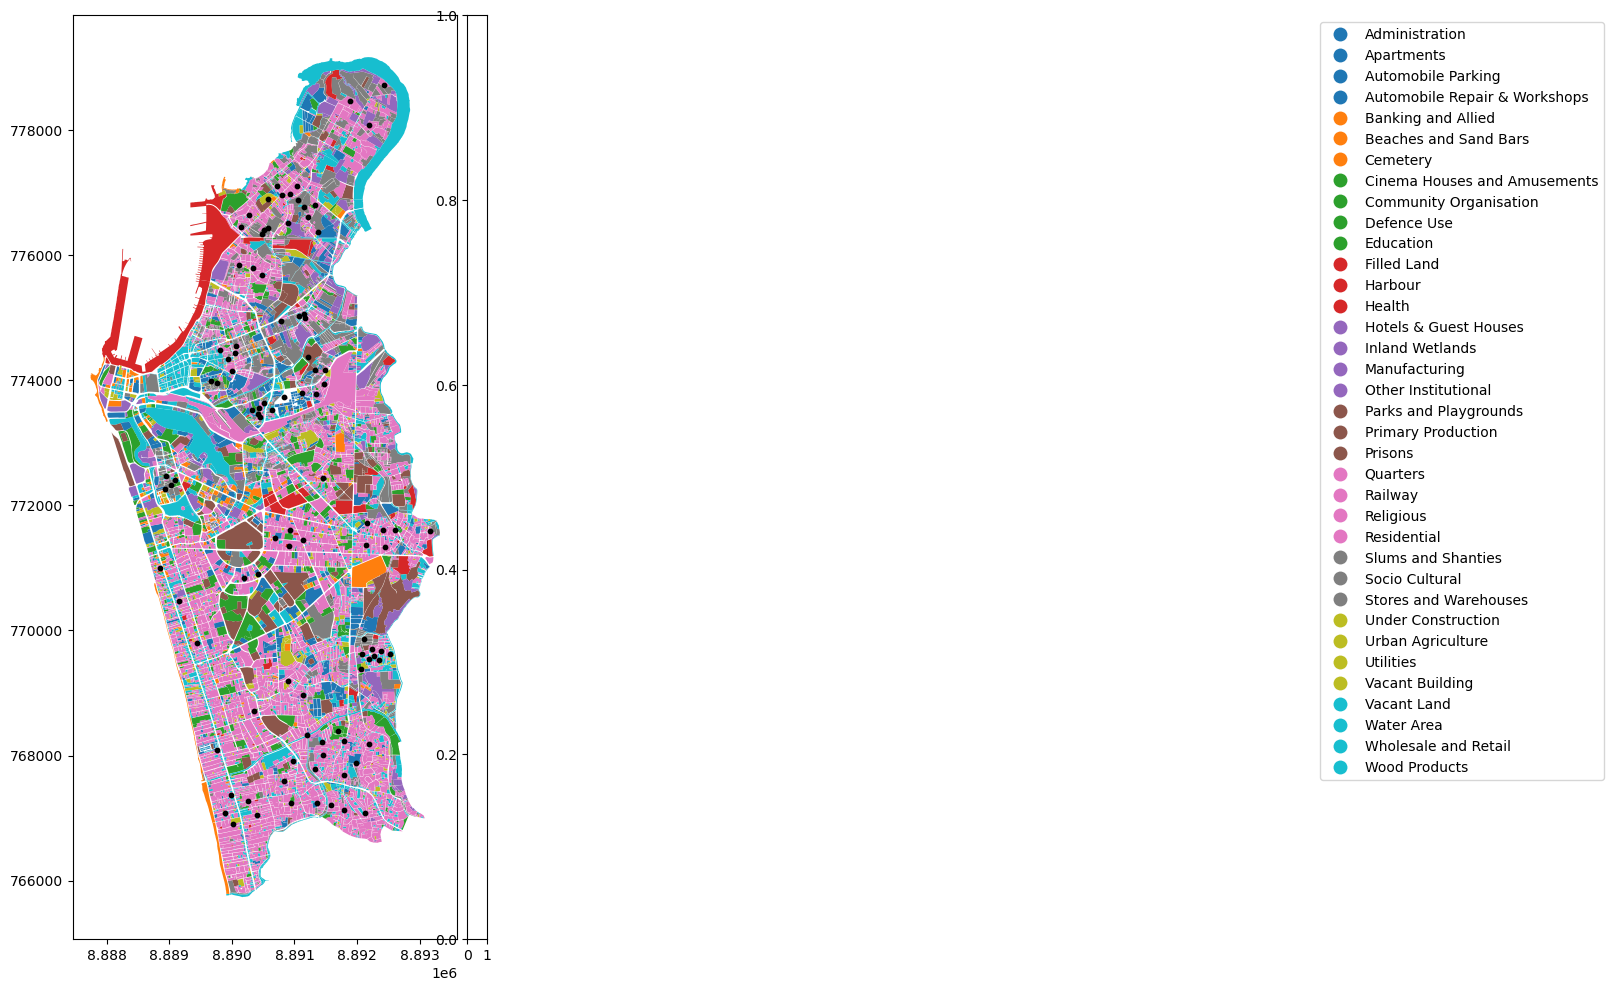

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1,figsize=(12,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
landuse_gdf.plot(column="DESCRIPTON",ax=ax, legend=True,legend_kwds={'bbox_to_anchor': (4, 1)},cax=cax)
patient_gdf.plot(ax=ax,color='black',markersize=10)

Overlay analysis of patients data set on top of landuse polygon to check the relationship between the two datasets.

![alt text](/home/download.png)

Overlay analysis of breeding locations dataset on top of landuse polygon to check the relationship between the two datasets.

![alt text](/home/Breeding.png)

By ploting patient locations and breeding locations we can perform a proximity analysis 

<AxesSubplot:>

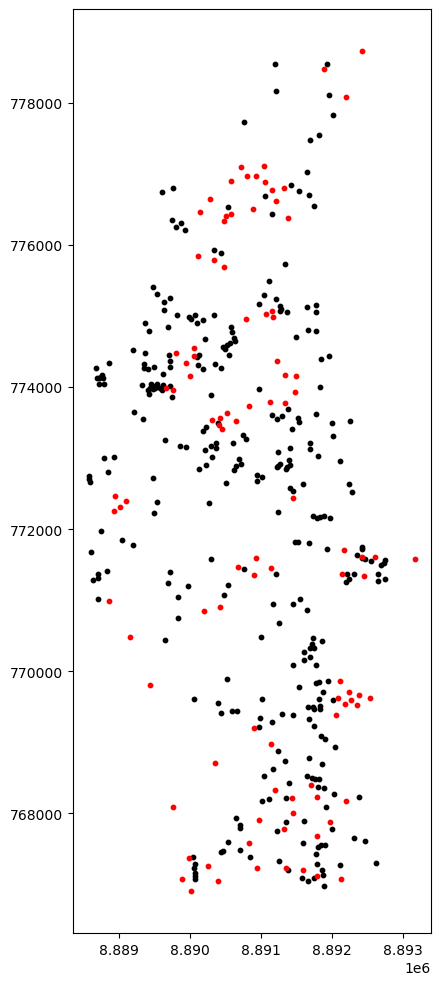

In [18]:
fig, ax = plt.subplots(1, 1,figsize=(12,12))
breeding_gdf.plot(ax=ax,color='black',markersize=10)
patient_gdf.plot(ax=ax,color='red',markersize=10)

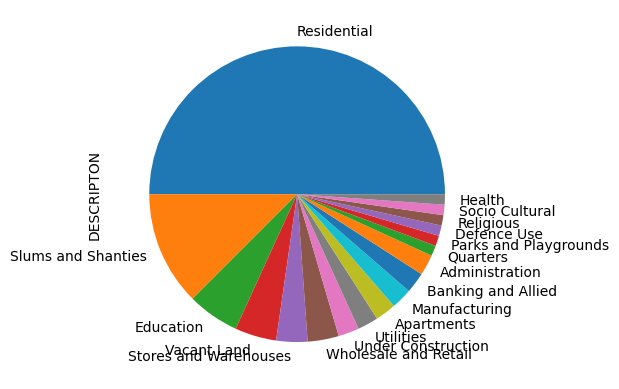

In [19]:
landusePatientIntersectdf=patient_gdf.overlay(landuse_gdf,how='intersection')
s=landusePatientIntersectdf['DESCRIPTON'].value_counts()
s.plot( kind = 'pie')
plt.savefig('plot.png')


From overlay of landuse and patients datasets we can see majority of patients are from residential and slums and shunties

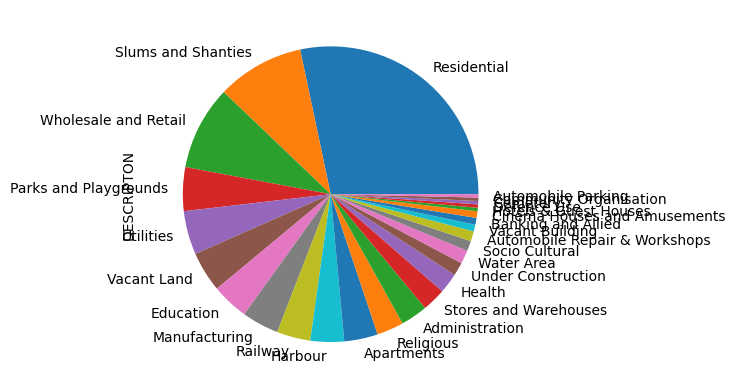

In [20]:
landuseBreedingIntersectdf=breeding_gdf.overlay(landuse_gdf,how='intersection')
s=landuseBreedingIntersectdf['DESCRIPTON'].value_counts()
s.plot( kind = 'pie')
plt.savefig('plot.png')


From the overlay between Landuse and breeding locations it has also show majority of the breeding locations are from residential area and slums and shunties.

All the dengue mosquito species have less than 400 meter range.So with that assumption 400m buffers created for patient locations and breeding locations point datasets to determine the relationship between them

In [22]:

patientBreedingIntersectDf.head()

,Id,Y,X,X_WGS_1,Y_WGS_1,IDNO,X_WGS_2,Y_WGS_2,geometry
0,1,191350.176120,98154.5,79.852109,6.921703,21,79.849027,6.917951,"POLYGON ((8889135.304 772003.454, 8889096.097 ..."
1,2,191267.315886,98078.6,79.851424,6.920953,21,79.849027,6.917951,"POLYGON ((8889135.923 771934.588, 8889097.845 ..."
2,3,191205.170710,97995.7,79.850675,6.920389,21,79.849027,6.917951,"POLYGON ((8889124.990 771901.421, 8889089.504 ..."
3,34,191419.226316,98002.6,79.850733,6.922325,21,79.849027,6.917951,"POLYGON ((8889096.035 772101.691, 8889059.076 ..."
4,1,191350.176120,98154.5,79.852109,6.921703,22,79.851696,6.916819,"POLYGON ((8889349.854 772092.324, 8889318.325 ..."


In [23]:
patient_gdf['area']=patient_gdf.area
patient_area=patient_gdf['area'].sum()
print(patient_area)

50184775.8487613


In [24]:
patientBreedingIntersectDf['area']=patientBreedingIntersectDf.area
patientBreedingIntersectArea=patientBreedingIntersectDf['area'].sum()
print(patientBreedingIntersectArea)



232592969.3555702


Based on the total area of patient 400m buffer polygon and total area of intersect between breeding location 400m and patient location 400m buffer we can assume at least 90% time patients can be found within 400m buffer from breeding locations

<a id='conclusions'></a>
# **5.Conclusions  & Future Research**

# Conclusions

* Relationship between the Landuse and patient locations

From overlay of landuse and patients datasets we can see more than 70% of patients are from residential and slums and shunties.From this 50% is residential and 20% is slums and shunties .Main reason for this is The dengue vectors, are container breeders; they breed in a wide variety of artificial and natural wet containers/receptacles, preferably with dark coloured surfaces and holding clear (unpolluted) water.


* Relationship between Landuse and Breeding Locations

From the overlay between Landuse and breeding locations it has also show majority of the breeding locations are from residential areas(25%) ,slums and shunties,Wholesale and retail, Parks and Playground combined(25%).This is caused because dengue breeding happend in  a wide variety of artificial and natural wet containers/receptacles, preferably with dark coloured surfaces and holding clear (unpolluted) water.

* Relationship between patient locations and Breeding locations.

Based on the total area of patient 400m buffer polygon and total area of intersect between breeding location 400m and patient location 400m buffer we can assume at least 90% time patients can be found within 400m buffer from breeding locations

Mosquito species that carry Dengue can travel up to 400 metres searching for water filled containers that can take up the role of their ‘nest’. Which unfortunately allows an enormous opportunity for these creatures to encounter human habituated areas 

# Future Research.

More complex spatial modeling researches have been done using larger datasets around the world to predict,prevent and model dengue outbreaks.Also to model the relationship between different variables related to Dengue fever(Bayesian spatial and spatio-temporal approaches)

Also various machine learning approaches have been done to predict,model and forcast dengue outbreaks.


<a id='references'></a>
# **6.References**

* World Health Organistion - *Dengue and severe dengue -  Key Facts * [online] who.int Availabel at: https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue  [Accessed 4 Dec. 2022]

* Centre for Dengue Research [online] at:https://www.sjp.ac.lk/research/centers/centre-for-dengue-research/#[Accessed 4 Dec. 2022]

* National Dengue Control Unit, Ministry of Health,Nutrition and Indigenous Medicine - Sri Lanka[online] at: http://www.dengue.health.gov.lk/web/index.php/en/[Accessed 4 Dec. 2022]

* ArcGIS Pro help [online] at :[https://pro.arcgis.com/](https://pro.arcgis.com/en/pro-app/latest/help/main/welcome-to-the-arcgis-pro-app-help.htm) [Accessed 4 Dec. 2022]

* Survey Department of Sri Lanka Data dictionary[online] at: https://www.survey.gov.lk/sdweb/pdf/surveydocuments/Data%20Dictionary/Data%20Dictionary%20New.pdf[Accessed 4 Dec. 2022]

* Pandas documentation[online] at:https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#[Accessed 4 Dec. 2022]

* GeoPandas documentation[online] at:https://geopandas.org/en/stable/index.html[Accessed 4 Dec. 2022]

* Folium documentation[online] at:https://python-visualization.github.io/folium/index.html[Accessed 4 Dec. 2022]

* A. Aswi, S. M. Cramb,P. Moraga and K. Mengersen
'Bayesian spatial and spatio-temporal approaches to modelling dengue fever: a systematic review'-Published online 2018 Oct 29 :https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6518570/

